In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import constants
eR = 78
e0 = constants.epsilon_0
R = constants.R
kB = constants.k
F = constants.physical_constants['Faraday constant'][0]
T = 298.15
e = constants.e
N = constants.N_A


from optics_calcs.opticscalcs import deltaKZ
from optics_calcs.aqueous import debyeLength
from optics_calcs.aqueous import GCpotential

In [26]:
conc = np.array([2e-6, 1.2e-5, 1e-4,1e-3])
pot = np.array([1.0758,  0.8656, 0.5671, 0.1419,])
poterror = np.array([0.044, 0.12, 0.28, 0.11])

In [33]:
def GCpot(C,ArbConst,sigma):
    return ArbConst*np.arcsinh(sigma/np.sqrt(8000*kB*T*N*C*e0*eR))

#fit function
ArbConst = 1
sigmaGuess = -0.1
guesses = [ArbConst,sigmaGuess]
popt, pcov = curve_fit(GCpot,conc,pot,p0=guesses)

#calculate standard error
pstd = np.sqrt(np.diag(pcov))
print(popt)

[-0.31212786 -0.00289773]


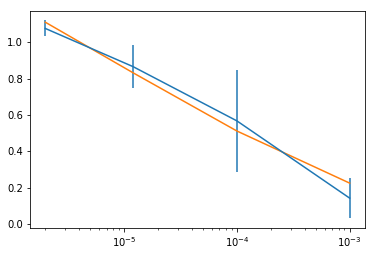

In [52]:
plt.figure()
plt.errorbar(conc,pot,poterror)
plt.plot(conc,GCpot(conc,popt[0],popt[1]))
plt.xscale("log")

In [60]:
GCpotential(50e-3,-0.03)

-0.05041910258117596